In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Load the dataset**

In [2]:
data = pd.read_csv("resource_management.csv")

**Summary of the data**

In [3]:
print(data.describe)

<bound method NDFrame.describe of    Employee_ID          Team  Allocated_Hours  Utilized_Hours  \
0          101  Audit_Team_A               40              38   
1          102  Audit_Team_B               35              30   
2          103  Audit_Team_A               45              42   
3          104  Audit_Team_C               30              25   
4          105  Audit_Team_B               50              40   
5          106  Audit_Team_A               38              36   
6          107  Audit_Team_C               25              20   

   Availability_Hours  Efficiency (%) Project_Assigned  Task_Status  
0                   5              95        Project_X    Completed  
1                  10              85        Project_Y  In Progress  
2                   2              93        Project_X    Completed  
3                   8              83        Project_Z      Pending  
4                  10              80        Project_Y  In Progress  
5                   4    

In [4]:
print(data.head())

   Employee_ID          Team  Allocated_Hours  Utilized_Hours  \
0          101  Audit_Team_A               40              38   
1          102  Audit_Team_B               35              30   
2          103  Audit_Team_A               45              42   
3          104  Audit_Team_C               30              25   
4          105  Audit_Team_B               50              40   

   Availability_Hours  Efficiency (%) Project_Assigned  Task_Status  
0                   5              95        Project_X    Completed  
1                  10              85        Project_Y  In Progress  
2                   2              93        Project_X    Completed  
3                   8              83        Project_Z      Pending  
4                  10              80        Project_Y  In Progress  


**Calculate average efficiency by team**

In [5]:
team_efficiency = data.groupby("Team")["Efficiency (%)"].mean()
print("Average Efficiency by Team:")
print(team_efficiency)

Average Efficiency by Team:
Team
Audit_Team_A    94.333333
Audit_Team_B    82.500000
Audit_Team_C    81.500000
Name: Efficiency (%), dtype: float64


**Total availability hours per team**

In [6]:
team_availability = data.groupby("Team")["Availability_Hours"].sum()
print("Total Availability Hours by Team:")
print(team_availability)

Total Availability Hours by Team:
Team
Audit_Team_A    11
Audit_Team_B    20
Audit_Team_C    20
Name: Availability_Hours, dtype: int64


**Task status distribution**

In [7]:
task_status_distribution = data["Task_Status"].value_counts()
print("Task Status Distribution:")
print(task_status_distribution)

Task Status Distribution:
Task_Status
Completed      3
In Progress    2
Pending        2
Name: count, dtype: int64


**Visualization**

***Efficiency by Team***

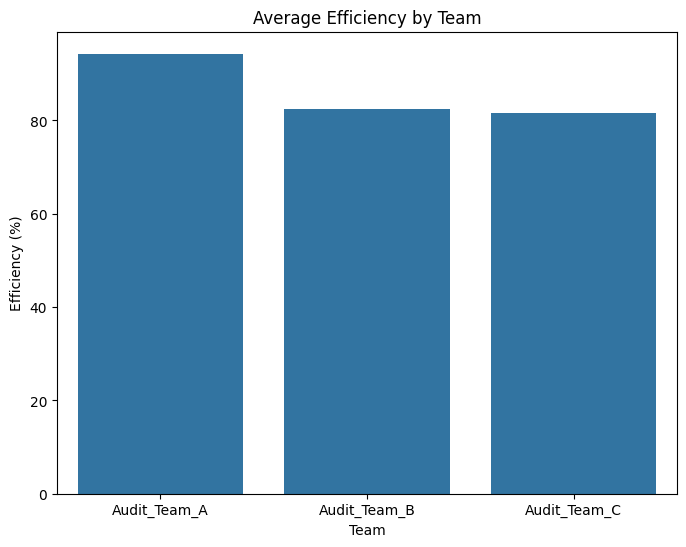

In [8]:
plt.figure(figsize=(8, 6))
sns.barplot(x=team_efficiency.index, y=team_efficiency.values)
plt.title("Average Efficiency by Team")
plt.ylabel("Efficiency (%)")
plt.xlabel("Team")
plt.show()

***Availability Hours per Team***

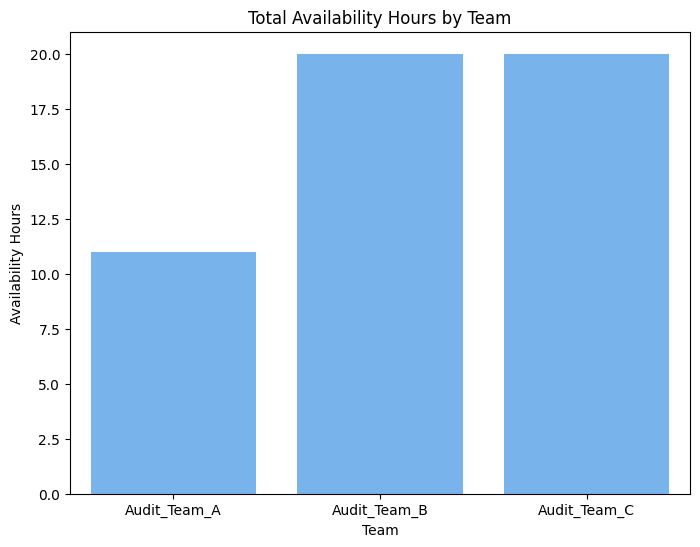

In [9]:
plt.figure(figsize=(8, 6))
sns.barplot(x=team_availability.index, y=team_availability.values, color=('#66b3ff'))
plt.title("Total Availability Hours by Team")
plt.ylabel("Availability Hours")
plt.xlabel("Team")
plt.show()

***Task Status Distribution***

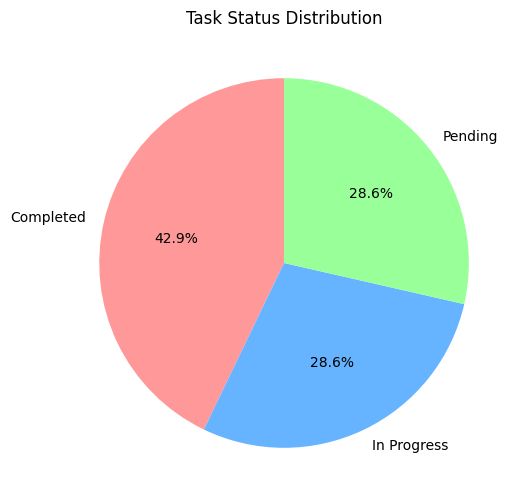

In [10]:
plt.figure(figsize=(6, 6))
task_status_distribution.plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'], startangle=90)
plt.title("Task Status Distribution")
plt.ylabel("")
plt.show()

***Allocated vs Utilized Hours***

<Figure size 1000x600 with 0 Axes>

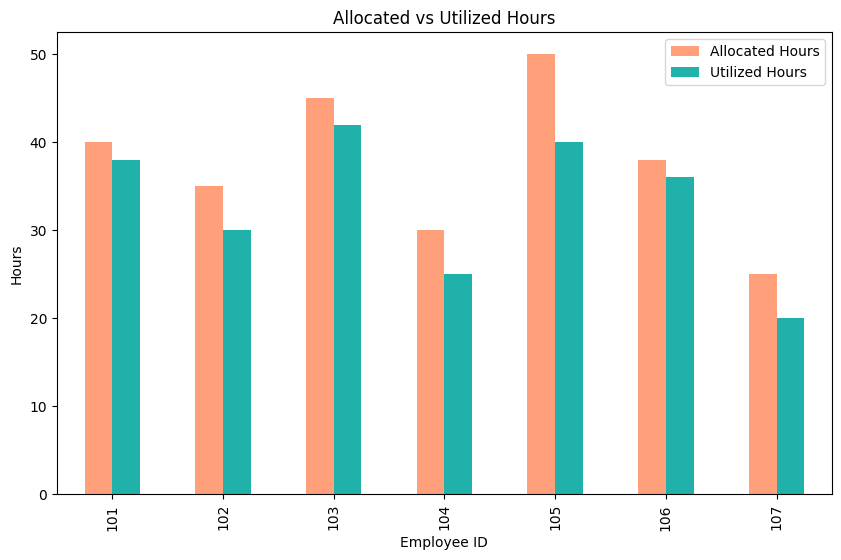

In [11]:
plt.figure(figsize=(10, 6))
data.plot(x="Employee_ID", y=["Allocated_Hours", "Utilized_Hours"], kind="bar", figsize=(10, 6), color=["#FFA07A", "#20B2AA"])
plt.title("Allocated vs Utilized Hours")
plt.xlabel("Employee ID")
plt.ylabel("Hours")
plt.legend(["Allocated Hours", "Utilized Hours"])
plt.show()

# Pivot operation: Total Utilized Hours and Average Efficiency by Team and Project

In [12]:
pivot_data = pd.pivot_table(data,
                            values=['Utilized_Hours', 'Efficiency (%)'],
                            index=['Team'],
                            columns=['Project_Assigned'],
                            aggfunc={'Utilized_Hours': 'sum', 'Efficiency (%)': 'mean'})

print("Pivot Table (Total Utilized Hours and Average Efficiency by Team and Project):")
print(pivot_data)

Pivot Table (Total Utilized Hours and Average Efficiency by Team and Project):
                 Efficiency (%)                     Utilized_Hours            \
Project_Assigned      Project_X Project_Y Project_Z      Project_X Project_Y   
Team                                                                           
Audit_Team_A          94.333333       NaN       NaN          116.0       NaN   
Audit_Team_B                NaN      82.5       NaN            NaN      70.0   
Audit_Team_C                NaN       NaN      81.5            NaN       NaN   

                            
Project_Assigned Project_Z  
Team                        
Audit_Team_A           NaN  
Audit_Team_B           NaN  
Audit_Team_C          45.0  


***Visualizing the Pivot Table***


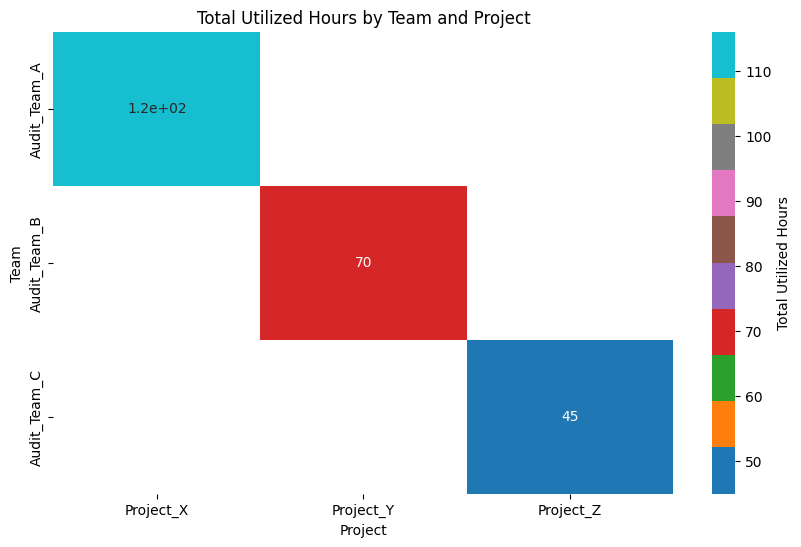

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data['Utilized_Hours'], annot=True, cmap="tab10", cbar_kws={'label': 'Total Utilized Hours'})
plt.title("Total Utilized Hours by Team and Project")
plt.ylabel("Team")
plt.xlabel("Project")
plt.show()

***Visualizing Average Efficiency by Team and Project***

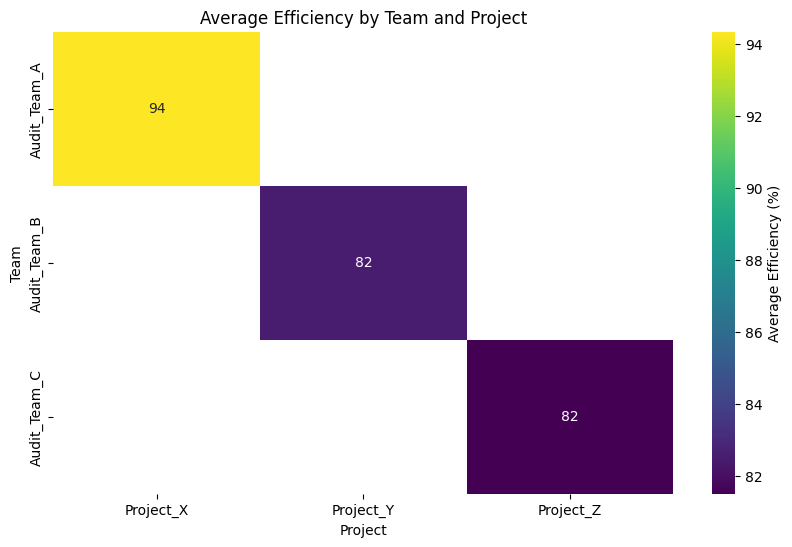

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data['Efficiency (%)'], annot=True, cmap="viridis", cbar_kws={'label': 'Average Efficiency (%)'})
plt.title("Average Efficiency by Team and Project")
plt.ylabel("Team")
plt.xlabel("Project")
plt.show()